Indians is are fond of watching movies of different genres and we can say that it is our favourite pass time.
We will be comparing teh tastes of age groups and genders. 
We will also check the ratings of dirrent movies with different languages.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Dataset.csv")
df

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...,...
50597,tt2784720,Sulagte Armaan,1984,-,-,-,Drama,hindi
50598,tt0315201,Aranya,1971,107 min,-,-,Drama,assamese
50599,tt0270221,Balayogini,1936,120 min,-,-,-,telugu
50600,tt0388697,Alajadi,1990,133 min,-,-,Drama,telugu


In [3]:
df.shape

(50602, 8)

In [4]:
dup= df[df.duplicated]
print(dup)

Empty DataFrame
Columns: [ID, Movie Name, Year, Timing(min), Rating(10), Votes, Genre, Language]
Index: []


There are no duplicated movies.

In [5]:
missingvalues= df.isnull().sum()
missingvalues

ID                0
Movie Name        0
Year           1561
Timing(min)       0
Rating(10)        0
Votes             0
Genre             0
Language          0
dtype: int64

In [6]:
print(df.dtypes)

ID             object
Movie Name     object
Year           object
Timing(min)    object
Rating(10)     object
Votes          object
Genre          object
Language       object
dtype: object


In [7]:
df["Year"].head(20)

0           1960
1           1968
2           2006
3           1987
4           1956
5           2008
6           2019
7           2007
8           1939
9           1992
10          1997
11    2018 Video
12          2016
13          1976
14          1958
15          1986
16          2013
17    2017 Video
18          1988
19          2012
Name: Year, dtype: object

There are some text with the year we need to remove it. 

In [8]:
import re
def cleanyear(year):
    match=re.search(r"\b(19|20)\d{2}\b", str(year))
    if match:
        return match.group()
    else:
        return None

df["Year"] = df["Year"].apply(cleanyear)
df["Year"] = df["Year"].astype("Int64")
print(df["Year"].head(20))


0     1960
1     1968
2     2006
3     1987
4     1956
5     2008
6     2019
7     2007
8     1939
9     1992
10    1997
11    2018
12    2016
13    1976
14    1958
15    1986
16    2013
17    2017
18    1988
19    2012
Name: Year, dtype: Int64


In [9]:
print(df["Year"].iloc[20:60])

20    2017
21    1974
22    1991
23    1990
24    2020
25    1988
26    2009
27    1978
28    1999
29    1935
30    1970
31    1985
32    1981
33    2000
34    <NA>
35    1987
36    2003
37    1967
38    1933
39    1996
40    2010
41    2017
42    <NA>
43    1995
44    1973
45    2000
46    2015
47    1950
48    2019
49    2015
50    2008
51    <NA>
52    1966
53    2021
54    1994
55    1989
56    2016
57    1997
58    2009
59    1938
Name: Year, dtype: Int64


We will now convert the objecttype of columns where needed

In [10]:
df["Year"]= pd.to_datetime(df["Year"].astype("Int64"), format= "%Y", errors="coerce")

In [11]:
df["Rating(10)"]= pd.to_numeric(df["Rating(10)"], errors= "coerce")
df["Votes"]= pd.to_numeric(df["Votes"], errors= "coerce")

we have seen that there is extra space in Genre column lets remove that extra space.

In [12]:
df['Genre'] = df['Genre'].str.strip()

In [13]:

print(df.dtypes)

ID                     object
Movie Name             object
Year           datetime64[ns]
Timing(min)            object
Rating(10)            float64
Votes                 float64
Genre                  object
Language               object
dtype: object


Now we will see what is the distribution of Ratings

In [14]:
df.rename(columns={"Rating(10)": "Ratings"}, inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21124\2809419977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ratings", data=df, palette='Set1')


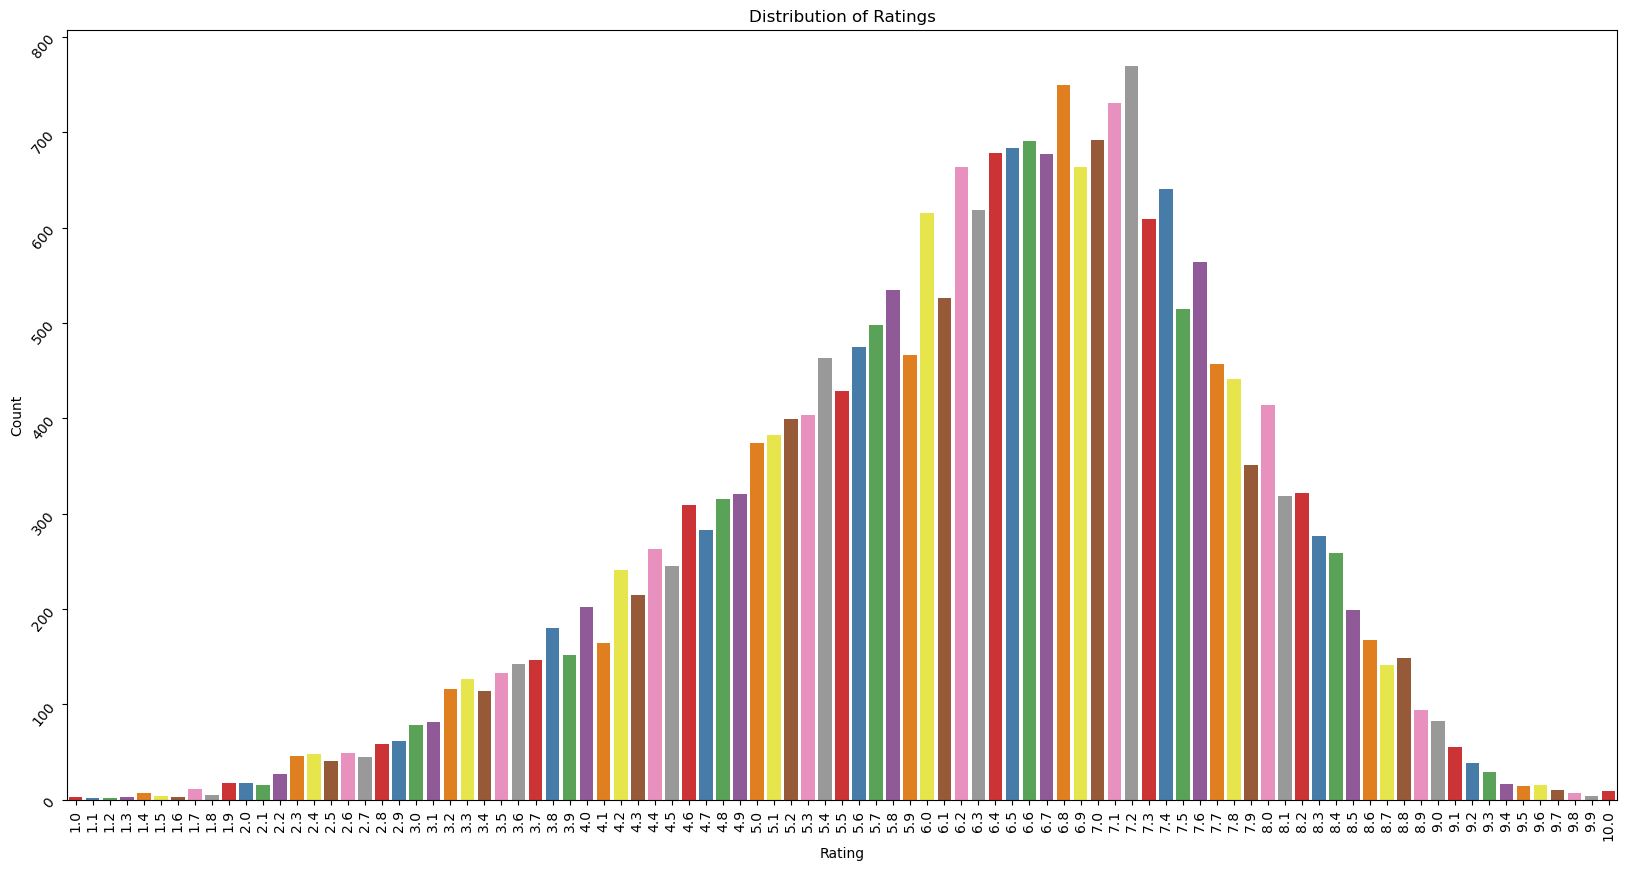

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x="Ratings", data=df, palette='Set1')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.yticks(rotation=50)
plt.xticks(rotation=90)
plt.show()

As per Chart most common rating is "7.2" Lets prove it.

In [16]:
common_rating= df["Ratings"].mode()[0]
print(f"The most common rating given by user is {common_rating}")

The most common rating given by user is 7.2


Now we will analyse the ditribution of Genre.

In [17]:
df['Genre'] = df['Genre'].str.split(', ')
exploded_genres = df.explode('Genre')
genre_counts = exploded_genres['Genre'].value_counts()


C:\Users\HP\AppData\Local\Temp\ipykernel_21124\3824728122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=exploded_genres, palette='Set2')


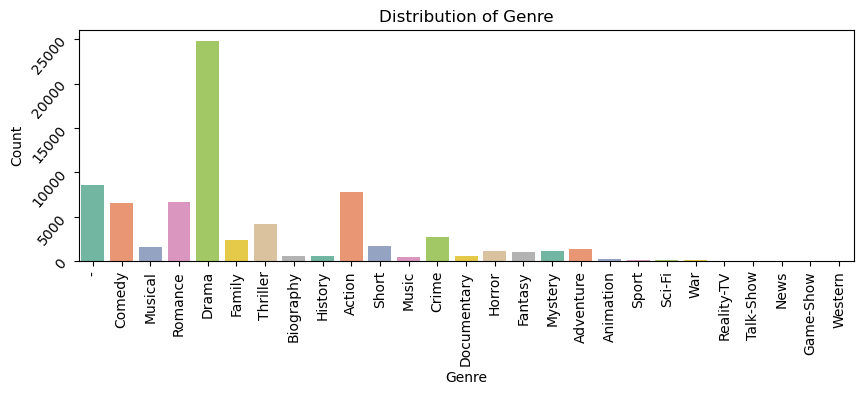

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(x='Genre', data=exploded_genres, palette='Set2')
plt.title("Distribution of Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.yticks(rotation=50)
plt.xticks(rotation=90)
plt.show()

We can see that most of the movies are of Drama Genre. 
Lets reconfirm it via code.

In [19]:
common_Genre= df["Genre"].mode()[0]
print(f"The most common Genre is {common_Genre}")

The most common Genre is ['Drama']


we will find out the co relation between Genre and Ratings

In [20]:
average_ratings= exploded_genres.groupby("Genre")["Ratings"].mean().reset_index()
sort_ratings=average_ratings.sort_values(by="Ratings", ascending=False)
print("Average Ratings by Genre:")
print(sort_ratings)

Average Ratings by Genre:
          Genre   Ratings
21        Short  7.912538
7   Documentary  7.638679
23    Talk-Show  7.609091
17         News  7.311765
12      History  7.127200
4     Biography  7.034304
25          War  6.910769
14        Music  6.805023
9        Family  6.538617
22        Sport  6.503731
15      Musical  6.456938
8         Drama  6.442843
2     Adventure  6.426568
3     Animation  6.389103
16      Mystery  6.314911
0             -  6.291119
19      Romance  6.209292
10      Fantasy  6.197582
6         Crime  6.110622
5        Comedy  6.042760
24     Thriller  6.034237
20       Sci-Fi  5.964815
18   Reality-TV  5.878571
1        Action  5.831006
26      Western  5.825000
13       Horror  5.311606
11    Game-Show  4.780000


We have seen that the Genre short is getting the highest ratings and the game show would be the least rated.
we will visualize it.

C:\Users\HP\AppData\Local\Temp\ipykernel_21124\2576580174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Ratings", x="Genre", data= sort_ratings, palette="Set2")


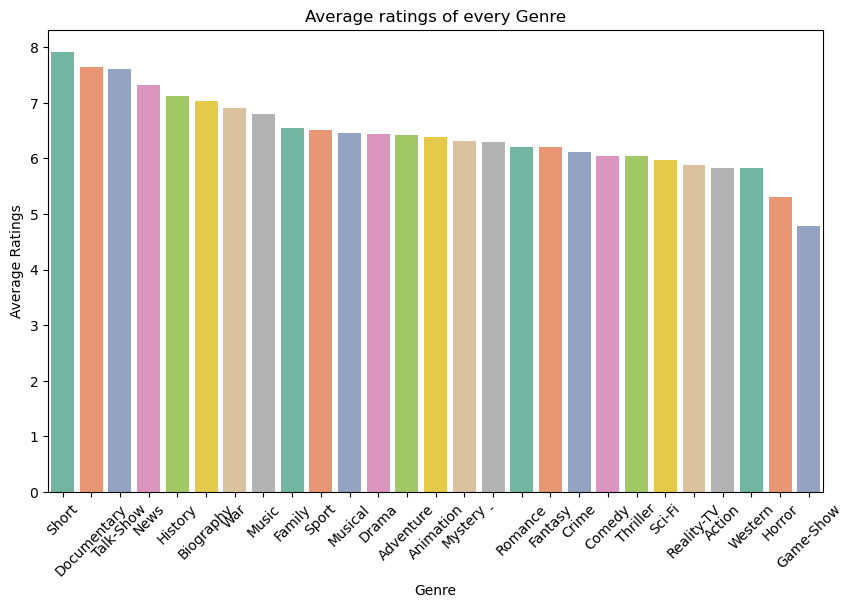

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(y="Ratings", x="Genre", data= sort_ratings, palette="Set2")
plt.title("Average ratings of every Genre")
plt.xlabel("Genre")
plt.ylabel("Average Ratings")
plt.xticks(rotation=45)
plt.show()

Highest and Lowest rated movies

In [22]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
top_rated_movies= df.sort_values(by="Ratings", ascending=False)
top10_rated_movies=top_rated_movies.head(10)
least_rated_movies= df.sort_values(by="Ratings", ascending=True)
least10_rated_movies= least_rated_movies.head(10)
top10_rated_movies["Type"]= "Highest Rated"
least10_rated_movies["Type"]= "Least Rated"
combined_table= pd.concat([top10_rated_movies, least10_rated_movies])
print("Highestand Least Rated Movies")
print(combined_table[["Movie Name", "Ratings", "Type"]])


Highestand Least Rated Movies
                     Movie Name  Ratings           Type
23887  Marasim - Beyond Borders     10.0  Highest Rated
34577  An Extraordinary Journey     10.0  Highest Rated
23850             Bihari Binani     10.0  Highest Rated
31301                   Harsukh     10.0  Highest Rated
39105                   Harsukh     10.0  Highest Rated
30151  Marasim - Beyond Borders     10.0  Highest Rated
42441                     Antak     10.0  Highest Rated
7812                    Ilu-Ilu     10.0  Highest Rated
32076   Ashi Fasli Nanachi Tang     10.0  Highest Rated
11575     Maassab (The Teacher)      9.9  Highest Rated
38173                 Prathigna      1.0    Least Rated
14081            Prema Panjaram      1.0    Least Rated
8409              Veera Prathap      1.0    Least Rated
23751                   Sadak 2      1.1    Least Rated
27202              Bhale Ramudu      1.1    Least Rated
27538                Mallepuvvu      1.2    Least Rated
18799    Alludu Di

Which are the top 10 most watched movies.
We will do it by number of Votes

In [23]:
most_watched_movie= df.sort_values(by="Votes", ascending=False)
top_10_watched_movies= most_watched_movie.head(10)
print("The top 10 most watched movies by the number of votes")
print(top_10_watched_movies[["Movie Name","Votes"]])

The top 10 most watched movies by the number of votes
                    Movie Name  Votes
31096               Mathilukal  999.0
21158  Where's the Party Yaar?  997.0
13067                     Raat  997.0
2415               Kaali Khuhi  996.0
36116                    Nabab  996.0
17024                  Khadgam  994.0
33057                   Sakthi  993.0
44133                 Bachelor  993.0
20139        Ek Je Chhilo Raja  993.0
42780                   Mayavi  991.0


Lets check if there are certain Genres which get higher ratings.

In [24]:
df.dtypes

ID                     object
Movie Name             object
Year           datetime64[ns]
Timing(min)            object
Ratings               float64
Votes                 float64
Genre                  object
Language               object
dtype: object

In [25]:
df["Genre"]=df["Genre"].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

In [26]:
df["Genre"].unique()

array(['-', 'Comedy, Musical, Romance', 'Comedy, Drama, Family',
       'Thriller', 'Drama', 'Biography, Drama, History', 'Action',
       'Comedy', 'Short, Music', 'Biography, History', 'Action, Thriller',
       'Comedy, Drama, Romance', 'Crime, Drama, Romance', 'Documentary',
       'Romance', 'Horror', 'Action, Crime, Musical', 'Family, Romance',
       'Action, Crime, Drama', 'Drama, Romance', 'Comedy, Drama',
       'Action, Comedy, Fantasy', 'Musical', 'Drama, Musical',
       'Short, Drama, Thriller', 'Action, Comedy, Mystery', 'Biography',
       'Musical, Romance', 'Action, Comedy, Drama',
       'Drama, Family, Fantasy', 'Action, Comedy',
       'Action, Drama, Thriller', 'Drama, Musical, Romance',
       'Action, Romance', 'Action, Drama', 'Fantasy', 'Short, Thriller',
       'Comedy, Thriller', 'Action, Adventure, Fantasy',
       'Drama, Romance, Thriller', 'Crime, Drama', 'Comedy, Romance',
       'Drama, Family, Musical', 'Drama, Family',
       'Crime, Mystery, Thrille

In [27]:
average_ratings_genre=df.groupby("Genre")["Ratings"].mean().reset_index()
average_ratings_genre=average_ratings_genre.sort_values(by="Ratings", ascending=False)
print("Average Rateing by Genre")
print(average_ratings_genre)

Average Rateing by Genre
                        Genre  Ratings
628  Short, Action, Adventure      9.7
640   Short, Biography, Drama      9.4
378      Documentary, Musical      9.2
218   Animation, Short, Music      9.2
635   Short, Adventure, Drama      9.0
..                        ...      ...
702       Short, Romance, War      NaN
704              Short, Sport      NaN
705          Short, Talk-Show      NaN
707    Short, Thriller, Drama      NaN
713          Thriller, Family      NaN

[718 rows x 2 columns]


In [28]:
df.head(20)

,ID,Movie Name,Year,Timing(min),Ratings,Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960-01-01,-,NaN,NaN,-,hindi
1,tt1702558,Nadir Khan,1968-01-01,-,NaN,NaN,-,urdu
2,tt0493437,Apna Sapna Money Money,2006-01-01,134 min,5.3,NaN,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987-01-01,-,2.2,20.0,-,urdu
4,tt0049595,Parivar,1956-01-01,-,7.4,21.0,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008-01-01,-,NaN,NaN,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019-01-01,112 min,7.9,16.0,Drama,hindi
7,tt0829459,A Mighty Heart,2007-01-01,108 min,6.6,NaN,"Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939-01-01,-,NaN,NaN,Action,hindi
9,tt0364628,Raktalekha,1992-01-01,175 min,6.3,12.0,Drama,bengali


Now we will perform the analysis to see how ratings have changed over time by using timestamp 

In [29]:
average_rating_by_year= df.groupby(df["Year"].dt.year)["Ratings"].mean().reset_index()

In [30]:
df = df.dropna(subset=['Ratings'])

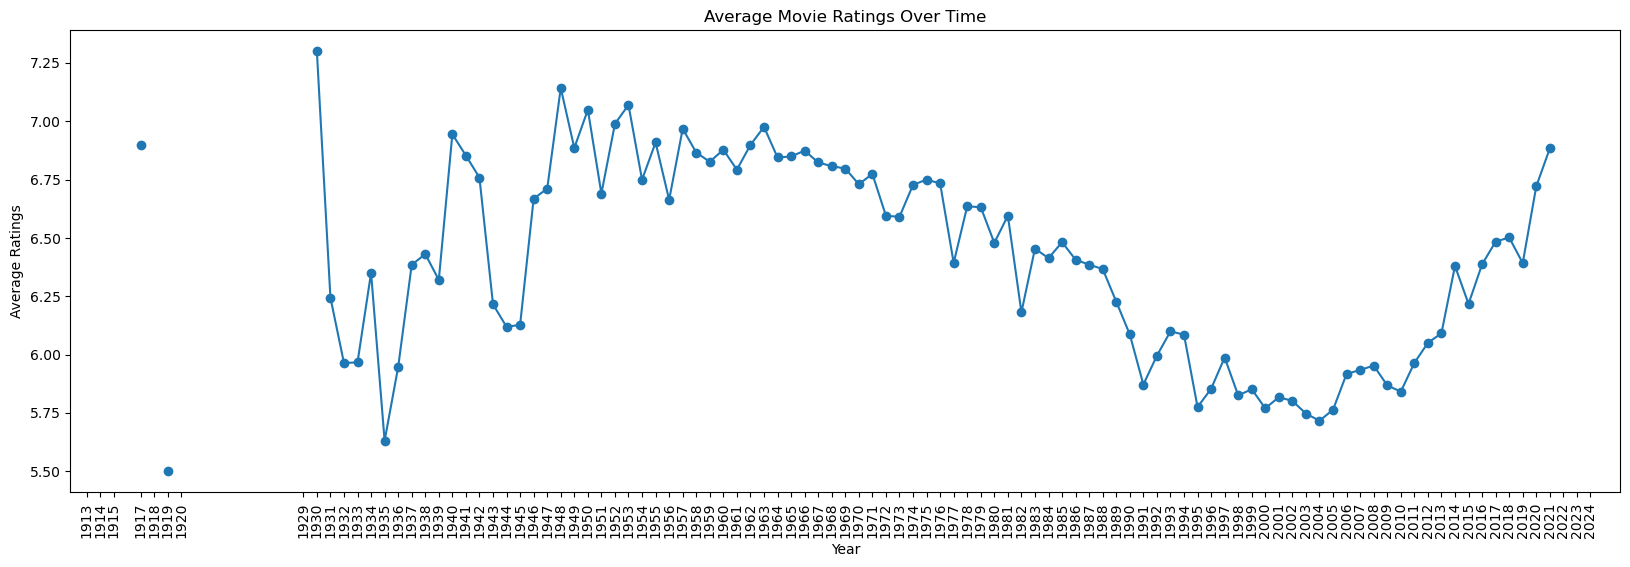

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(average_rating_by_year["Year"], average_rating_by_year["Ratings"], marker='o')
plt.title("Average Movie Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Ratings")
plt.xticks(average_rating_by_year["Year"], rotation=90) 
plt.show()

 Investigating if there are particular years or seasons where movies receive higher ratings.

In [32]:
df.head(20)

,ID,Movie Name,Year,Timing(min),Ratings,Votes,Genre,Language
2,tt0493437,Apna Sapna Money Money,2006-01-01,134 min,5.3,NaN,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987-01-01,-,2.2,20.0,-,urdu
4,tt0049595,Parivar,1956-01-01,-,7.4,21.0,"Comedy, Drama, Family",hindi
6,tt6597160,Jacqueline I Am Coming,2019-01-01,112 min,7.9,16.0,Drama,hindi
7,tt0829459,A Mighty Heart,2007-01-01,108 min,6.6,NaN,"Biography, Drama, History",urdu
9,tt0364628,Raktalekha,1992-01-01,175 min,6.3,12.0,Drama,bengali
10,tt0364733,Veedevadandi Babu,1997-01-01,138 min,5.6,218.0,Comedy,telugu
12,tt5684550,Da Tang Xuan Zang,2016-01-01,90 min,6.2,379.0,"Biography, History",sanskrit
15,tt0318983,Amman Koil Kizhakkaalae,1986-01-01,141 min,6.9,63.0,Drama,tamil
16,tt3148392,Shatru,2013-01-01,-,4.5,11.0,"Action, Thriller",kannada


We will do visualizations (histograms, bar plots, heatmaps)

we will do distribution of Movie Ratings via Histogram

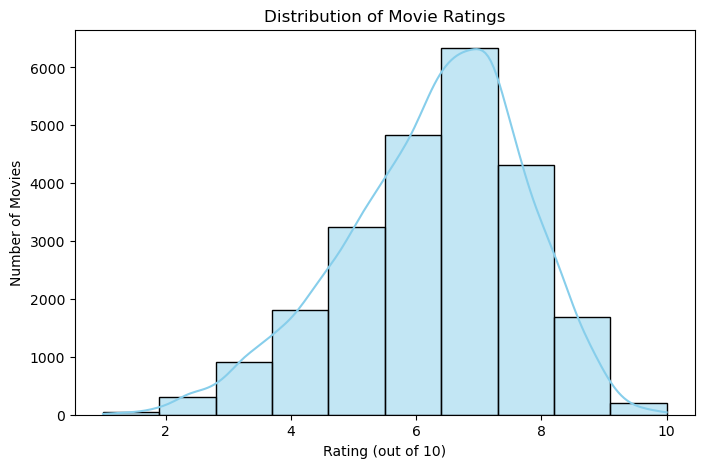

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Ratings'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Number of Movies')
plt.show()

Heatmap of Average Movie Ratings by Genre and Language

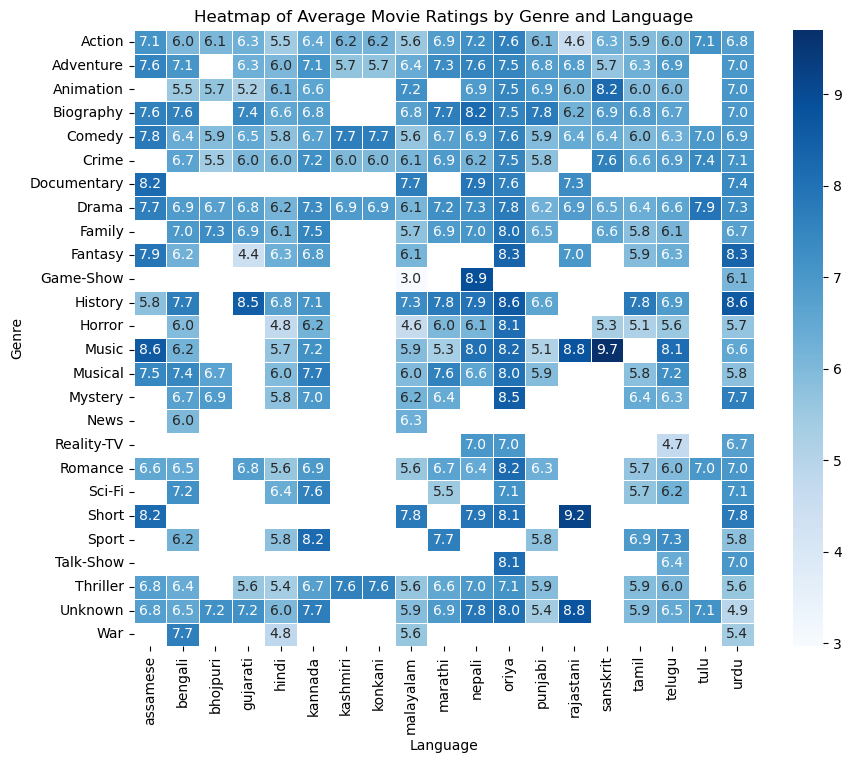

In [34]:
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if x != '-' else 'Unknown')
heatmap_data = pd.pivot_table(df, values='Ratings', index='Primary Genre', columns='Language', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', linewidths=.5, fmt='.1f')
plt.title('Heatmap of Average Movie Ratings by Genre and Language')
plt.ylabel('Genre')
plt.xlabel('Language')
plt.show()

distribution of ratigns across differnt generese via boxplot

C:\Users\HP\AppData\Local\Temp\ipykernel_21124\3489644049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Primary Genre', y='Ratings', data=df, palette='Set3')


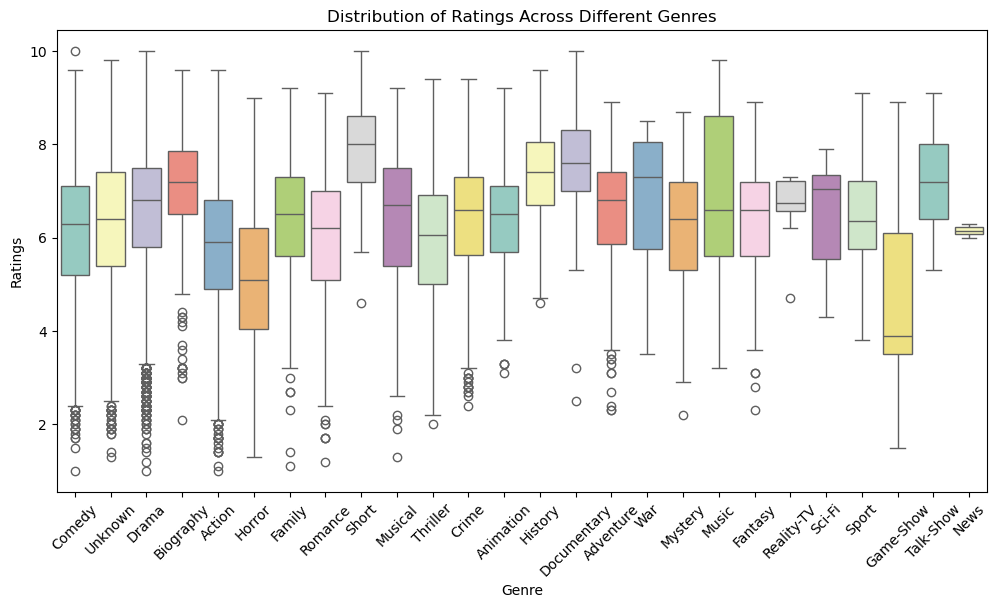

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Primary Genre', y='Ratings', data=df, palette='Set3')
plt.title('Distribution of Ratings Across Different Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.show()

Below would be my summary of the above analysis.

The analysis of movie ratings and votes reveals that genres like Drama and Biography consistently perform well, with higher median ratings and audience engagement, as seen in films such as "Jacqueline I Am Coming" and "Tukaram." These genres exhibit a more stable and positive reception, while Comedy and Action genres show a wider range of ratings, indicating varied audience responses. 
Notably, Horror tends to have lower ratings overall. Movies such as "Veedevadandi Babu" and "Da Tang Xuan Zang" stand out with higher votes, showing stronger audience engagement, while other films, particularly lesser-known ones like "Shatru" and "Milan Ki Raat," have minimal votes, reflecting lower visibility or interest. 
There appears to be a correlation between the number of votes and higher ratings, as movies with more engagement tend to perform better in terms of ratings.
However, some movies have incomplete vote data, making it harder to gauge their overall popularity. Overall, Drama and Biography dominate both in quality and audience interaction, while Comedy and Action show mixed results depending on the specific film.

For further analysis or recommendations for improving user engagement based on the insights my suggestions would be as below:

1. Deeper Genre Analysis: 
Investigate subgenres (e.g., splitting Comedy into romantic comedies, dark comedies, etc.) to understand which specific types of films within larger genres drive higher ratings or engagement.

2. Time-Based Trends: 
Analyze how ratings and engagement trends evolve over time. This could highlight shifts in audience preferences, such as whether older movies or more recent releases attract more votes or receive better ratings.

3. Impact of Language on Engagement: 
A more detailed analysis of how movies in different languages perform in terms of ratings and votes could uncover whether language influences audience reception or if certain languages tend to have a more engaged audience.

4. User Demographic Data: 
Incorporating demographic data (if available) such as age, gender, or geographic location could offer insights into the specific preferences of various user groups, helping target content more effectively.

5. Correlation Between Votes and Ratings: 
Conduct a statistical analysis to confirm the correlation between the number of votes and ratings, potentially revealing whether highly rated films consistently attract more votes or if user engagement is independent of quality.
Review and Sentiment Analysis: Analyzing user reviews and conducting sentiment analysis on written feedback can help uncover what aspects of the films resonate positively or negatively with audiences, beyond just ratings and votes.

Recommendations for Improving User Engagement:

1. Leverage Popular Genres: 
Since Drama and Biography genres show strong performance, producers and platforms should consider focusing more on high-quality films in these categories. This could involve promoting these genres to specific audience segments with tailored marketing strategies.

2. Revitalizing Low-Performing Genres: 
For genres like Horror or Action, a focus on enhancing storytelling, production quality, or star power could help increase ratings. Hosting genre-themed events or promotions (e.g., horror marathons) may boost engagement for underperforming genres.

3. Encourage Voting and Reviews: 
Implement features that encourage more users to rate and review films. For example, platforms can offer incentives like badges for frequent reviewers or highlight user reviews to motivate others to engage.

4. Personalized Recommendations: 
Use algorithms to provide personalized movie recommendations based on user behavior and preferences. Promoting high-rated films from genres the user enjoys can drive further engagement.

5. Audience Polls and Engagement Features: 
Introduce interactive features like polls or Q&A sessions with directors/actors to deepen audience involvement. This could encourage users to vote and rate movies more frequently.

6. Highlight Underrated Films: 
Promote lesser-known but highly rated films (like "Tukaram" or "Jacqueline I Am Coming") on the platform’s main page or through social media campaigns to increase visibility and engagement.

These steps can help drive more user participation, enhance satisfaction with the platform, and ultimately improve the connection between the audience and the films.